# Final project- Internet of Things and Data Analytics

## Step1. Imort library

In [1]:
# imoport library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Step2. Imort dataset

In [ ]:
# import dataset
df = pd.read_csv('madpollution_output.csv')
df.info()

def get_experiment_data():
    temp = df['CO']
    df.pop('CO')
    df.insert(df.shape[1], 'CO', temp)
        
    X = df.iloc[:, :-1].values
    Y = df.iloc[:, df.shape[1]-1].values
    return [X, Y]

[X,Y] = get_experiment_data()

print(X.shape, Y.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14749 entries, 0 to 14748
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           14749 non-null  int64  
 1   month          14749 non-null  int64  
 2   day            14749 non-null  int64  
 3   hour           14749 non-null  int64  
 4   minute         14749 non-null  int64  
 5   second         14749 non-null  int64  
 6   laborday       14749 non-null  int64  
 7   saturday       14749 non-null  int64  
 8   sunday         14749 non-null  int64  
 9   holiday        14749 non-null  int64  
 10  CO             14749 non-null  float64
 11  PM25           14749 non-null  float64
 12  NOx            14749 non-null  float64
 13  O3             14749 non-null  float64
 14  windspeed      14749 non-null  float64
 15  winddirection  14749 non-null  float64
 16  temperature    14749 non-null  float64
 17  humidity       14749 non-null  float64
 18  pressu

1. Repeat the experiment, but removing the columns year,month,day,hour,minute,second,laborday,saturday,sunday,holiday, to check the influence of these "date columns" in the MAE.

In [ ]:
def get_experiment_date_data():
    df1 = df.drop(['year','month','day','hour','minute','second','laborday','saturday','sunday','holiday', 'CO'], axis=1)
    return [df1.values, Y]

print(get_experiment_date_data())

[array([[  10.  ,   29.  ,   58.87, ...,  943.  ,    0.  ,  570.  ],
       [  10.  ,   18.  ,   63.73, ...,  943.  ,    0.  ,  404.  ],
       [   9.  ,   19.  ,   66.5 , ...,  943.  ,    0.  ,  287.  ],
       ...,
       [  11.  ,   94.  ,    0.  , ...,  948.  ,    0.  , 1096.  ],
       [   6.  ,   84.  ,    0.  , ...,  949.  ,    0.  ,  835.  ],
       [   5.  ,   35.  ,    0.  , ...,  950.  ,    0.  ,  631.  ]]), array([0.2, 0.2, 0.1, ..., 0.4, 0.3, 0.2])]


2. Repeat the experiment, but removing the columns windspeed,winddirection,temperature,humidity,pressure,rain to check the influence of these "weather columns" in the MAE.

In [ ]:
def get_experiment_weather_data():
    df2 = df.drop(['windspeed','winddirection','temperature','humidity','pressure','rain','CO'], axis=1)
    return [df2.values, Y]

print(get_experiment_weather_data())

[array([[2.019e+03, 8.000e+00, 1.000e+00, ..., 2.900e+01, 5.887e+01,
        5.700e+02],
       [2.019e+03, 8.000e+00, 1.000e+00, ..., 1.800e+01, 6.373e+01,
        4.040e+02],
       [2.019e+03, 8.000e+00, 1.000e+00, ..., 1.900e+01, 6.650e+01,
        2.870e+02],
       ...,
       [2.021e+03, 5.000e+00, 2.500e+01, ..., 9.400e+01, 0.000e+00,
        1.096e+03],
       [2.021e+03, 5.000e+00, 2.500e+01, ..., 8.400e+01, 0.000e+00,
        8.350e+02],
       [2.021e+03, 5.000e+00, 2.500e+01, ..., 3.500e+01, 0.000e+00,
        6.310e+02]]), array([0.2, 0.2, 0.1, ..., 0.4, 0.3, 0.2])]


3. Repeat the experiment, but removing the column traffic to check the influence of these "traffic columns" in the MAE.

In [ ]:
def get_experiment_traffic_data():
    df3 = df.drop(['traffic','CO'], axis=1)
    return [df3.values, Y]

print(get_experiment_traffic_data())

[array([[2.019e+03, 8.000e+00, 1.000e+00, ..., 5.200e+01, 9.430e+02,
        0.000e+00],
       [2.019e+03, 8.000e+00, 1.000e+00, ..., 5.500e+01, 9.430e+02,
        0.000e+00],
       [2.019e+03, 8.000e+00, 1.000e+00, ..., 5.500e+01, 9.430e+02,
        0.000e+00],
       ...,
       [2.021e+03, 5.000e+00, 2.500e+01, ..., 3.200e+01, 9.480e+02,
        0.000e+00],
       [2.021e+03, 5.000e+00, 2.500e+01, ..., 4.200e+01, 9.490e+02,
        0.000e+00],
       [2.021e+03, 5.000e+00, 2.500e+01, ..., 5.100e+01, 9.500e+02,
        0.000e+00]]), array([0.2, 0.2, 0.1, ..., 0.4, 0.3, 0.2])]


## Step3. Splitting the data set into a training set and a test set

In [ ]:
# Splitting the data set into a training set and a test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn import metrics

def print_score(Y_test, Y_pred):
    print("Explained Variance Score: ", metrics.explained_variance_score(Y_test, Y_pred))
    print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

def visual_predict(Y_test, Y_pred, title):
    fig, ax = plt.subplots(figsize=(10,6))
    ax.scatter(Y_test, Y_pred)
    ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=4)
    ax.set_title(title,fontsize=18)
    plt.text(1.4,0,"Mean absolute error: %.4f" % metrics.mean_absolute_error(Y_test, Y_pred),fontsize=15)
    plt.text(1.4,0.5,'$R^2$: %.4f' % metrics.r2_score(Y_test, Y_pred),fontsize=15)
    ax.set_xlabel('Measured',fontsize=15)
    ax.set_ylabel('Predicted',fontsize=15) 
    plt.show()

def do_experiment(data, title, model, model_params=None):
    X_train, X_test, Y_train, Y_test = train_test_split(data[0], data[1], test_size = 0.2, random_state = 0)
    mod = model(**model_params) if model_params else model()
    mod.fit(X_train, Y_train)
    Y_pred = mod.predict(X_test)
    
    print_score(Y_test, Y_pred)
    visual_predict(Y_test, Y_pred, title)

## Linear Regression

In [ ]:
# Training a multiple linear regression model on the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# Predicting results on the test set
Y_pred = regressor.predict(X_test)

print_score(Y_test, Y_pred)

Explained Variance Score:  0.8502550526027133
Mean Absolute Error: 0.05355486240947904
Mean Squared Error: 0.006260175971676975
Root Mean Squared Error: 0.07912127382491371


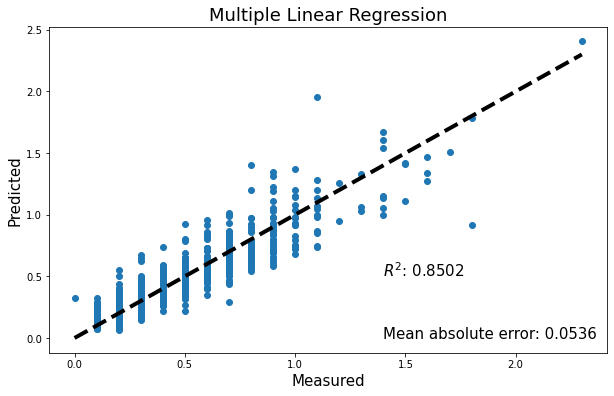

In [ ]:
visual_predict(Y_test, Y_pred, 'Multiple Linear Regression')

1. Repeat the experiment,check the influence of these "date columns" in the MAE.

Explained Variance Score:  0.8429423149732924
Mean Absolute Error: 0.055066647625233625
Mean Squared Error: 0.006563526702023425
Root Mean Squared Error: 0.08101559542472933


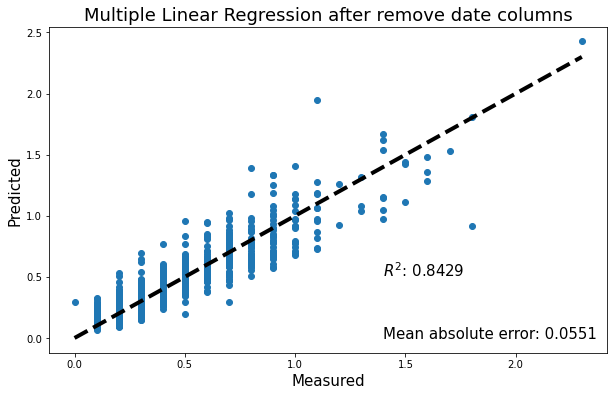

In [ ]:
do_experiment(get_experiment_date_data(), 'Multiple Linear Regression after remove date columns', LinearRegression)

2. Repeat the experiment,check the influence of these "weathter columns" in the MAE.

Explained Variance Score:  0.8262636744439527
Mean Absolute Error: 0.0584808763421502
Mean Squared Error: 0.007260697812237904
Root Mean Squared Error: 0.08520972838964988


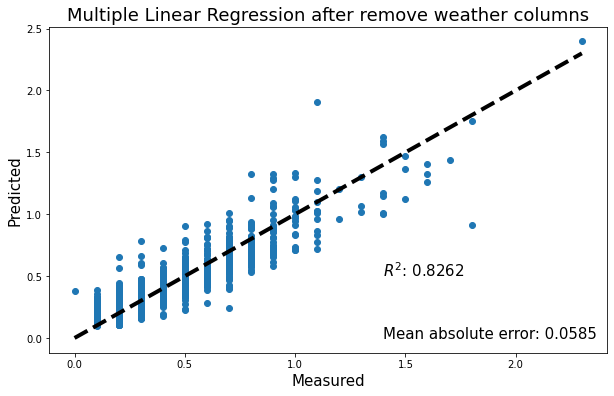

In [ ]:
do_experiment(get_experiment_weather_data(), 'Multiple Linear Regression after remove weather columns', LinearRegression)

3. Repeat the experiment,check the influence of these "traffic columns" in the MAE.

Explained Variance Score:  0.8495167339603302
Mean Absolute Error: 0.053795571727093754
Mean Squared Error: 0.006290993757962069
Root Mean Squared Error: 0.07931578504914434


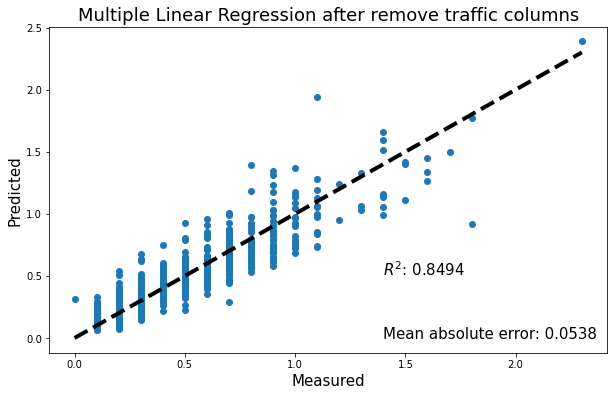

In [ ]:
do_experiment(get_experiment_traffic_data(), 'Multiple Linear Regression after remove traffic columns', LinearRegression)

## Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# 决策树回归模型
regression_equation = DecisionTreeRegressor()
regression_equation.fit(X_train, Y_train)

Y_pred = regression_equation.predict(X_test)

In [ ]:
print_score(Y_test, Y_pred)

Explained Variance Score:  0.8162278984462505
Mean Absolute Error: 0.046203389830508555
Mean Squared Error: 0.007677966101694915
Root Mean Squared Error: 0.08762400414095965


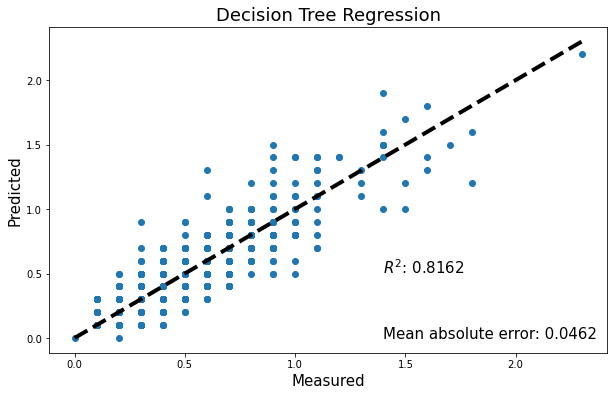

In [ ]:
visual_predict(Y_test, Y_pred, 'Decision Tree Regression')

1. Repeat the experiment,check the influence of these "date columns" in the MAE.

Explained Variance Score:  0.7538495541486624
Mean Absolute Error: 0.05966101694915256
Mean Squared Error: 0.010284745762711864
Root Mean Squared Error: 0.10141373557221854


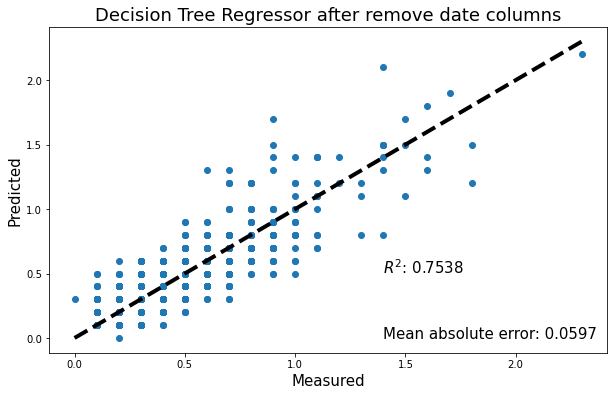

In [ ]:
do_experiment(get_experiment_date_data(), 'Decision Tree Regressor after remove date columns', DecisionTreeRegressor)

2. Repeat the experiment,check the influence of these "weathter columns" in the MAE.

Explained Variance Score:  0.8039784419466937
Mean Absolute Error: 0.0454915254237289
Mean Squared Error: 0.008189830508474577
Root Mean Squared Error: 0.09049768233758573


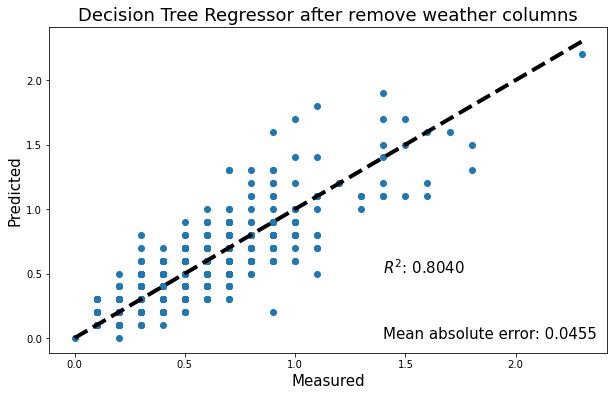

In [ ]:
do_experiment(get_experiment_weather_data(), 'Decision Tree Regressor after remove weather columns', DecisionTreeRegressor)

3. Repeat the experiment,check the influence of these "traffic columns" in the MAE.

Explained Variance Score:  0.8155953135470312
Mean Absolute Error: 0.04444067796610176
Mean Squared Error: 0.007705084745762712
Root Mean Squared Error: 0.08777861212028083


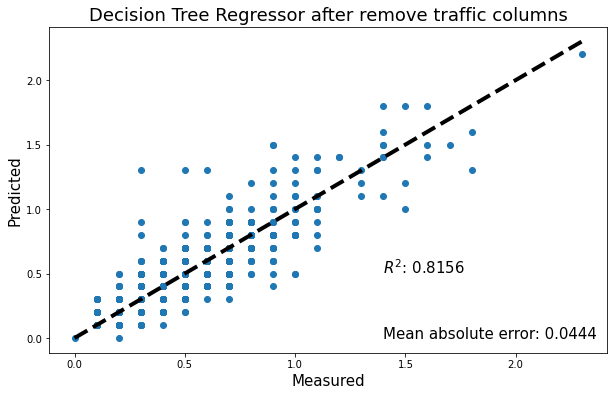

In [ ]:
do_experiment(get_experiment_traffic_data(), 'Decision Tree Regressor after remove traffic columns', DecisionTreeRegressor)

## Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

rr = Ridge(alpha=0.01) 
rr.fit(X_train, Y_train)

Y_pred = rr.predict(X_test)

In [ ]:
print_score(Y_test, Y_pred)

Explained Variance Score:  0.8502550547869945
Mean Absolute Error: 0.05355486012216239
Mean Squared Error: 0.006260175878946406
Root Mean Squared Error: 0.07912127323891095


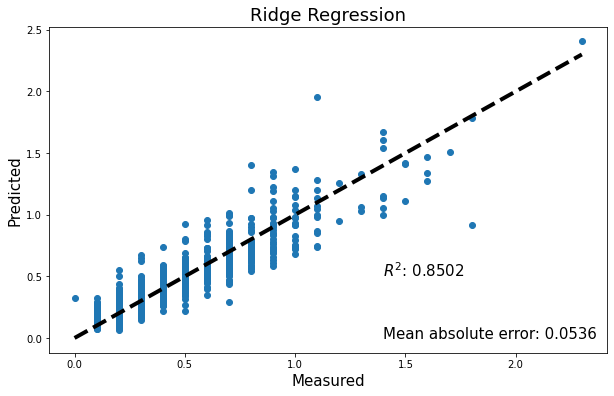

In [ ]:
visual_predict(Y_test, Y_pred, 'Ridge Regression')

1. Repeat the experiment,check the influence of these "date columns" in the MAE.

Explained Variance Score:  0.8429423149639634
Mean Absolute Error: 0.05506664759444892
Mean Squared Error: 0.006563526702197165
Root Mean Squared Error: 0.0810155954258016


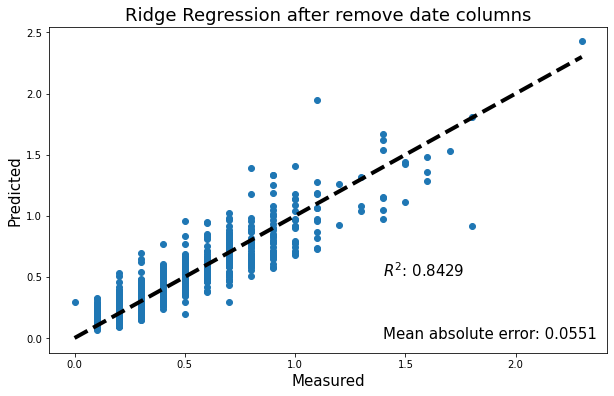

In [ ]:
do_experiment(get_experiment_date_data(), 'Ridge Regression after remove date columns', Ridge, {'alpha': 0.01})

2. Repeat the experiment,check the influence of these "weathter columns" in the MAE.

Explained Variance Score:  0.8262636718943005
Mean Absolute Error: 0.058480874348848806
Mean Squared Error: 0.007260697920343229
Root Mean Squared Error: 0.08520972902399836


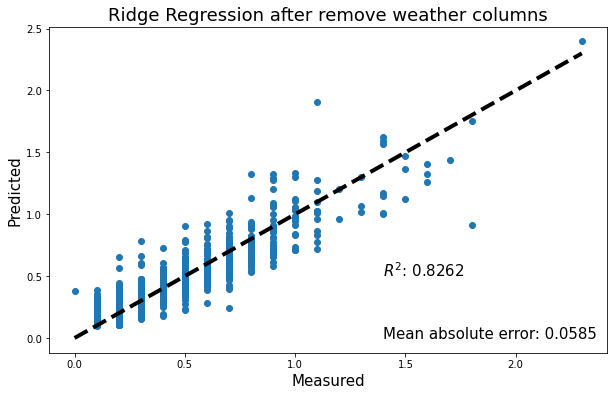

In [ ]:
do_experiment(get_experiment_weather_data(), 'Ridge Regression after remove weather columns', Ridge, {'alpha': 0.01})

Explained Variance Score:  0.8495167348196029
Mean Absolute Error: 0.05379557032782478
Mean Squared Error: 0.006290993721906954
Root Mean Squared Error: 0.07931578482185594


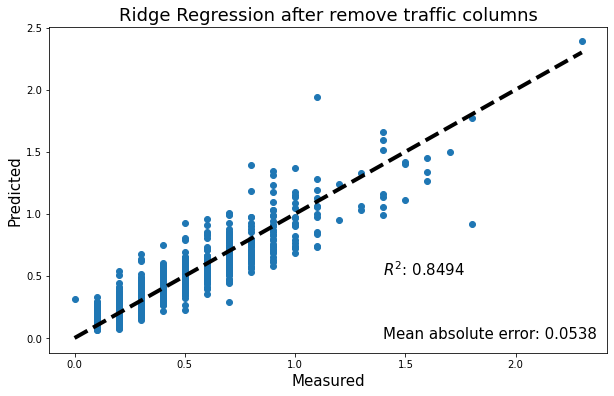

In [ ]:
do_experiment(get_experiment_traffic_data(), 'Ridge Regression after remove traffic columns', Ridge, {'alpha': 0.01})

3. Repeat the experiment,check the influence of these "traffic columns" in the MAE.

## ElasticNet Regression

In [ ]:
from sklearn.linear_model import ElasticNet

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
enet = ElasticNet(random_state=0)
Y_pred = enet.fit(X_train, Y_train).predict(X_test)

In [ ]:
print_score(Y_test, Y_pred)

Explained Variance Score:  0.8049672016020089
Mean Absolute Error: 0.06232899146849128
Mean Squared Error: 0.008148424184762602
Root Mean Squared Error: 0.09026862237102437


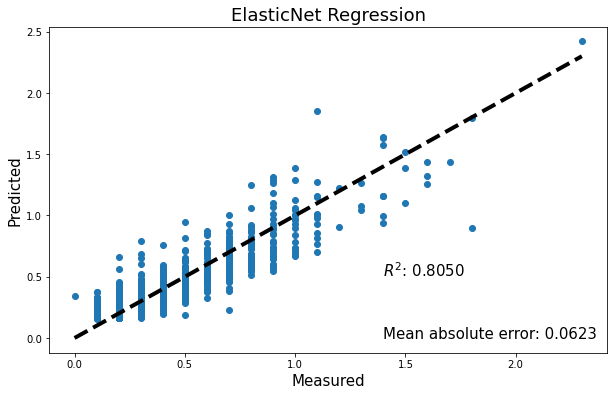

In [ ]:
visual_predict(Y_test, Y_pred, 'ElasticNet Regression')

1. Repeat the experiment,check the influence of these "date columns" in the MAE.

Explained Variance Score:  0.8049672016020089
Mean Absolute Error: 0.06232899146849128
Mean Squared Error: 0.008148424184762604
Root Mean Squared Error: 0.09026862237102438


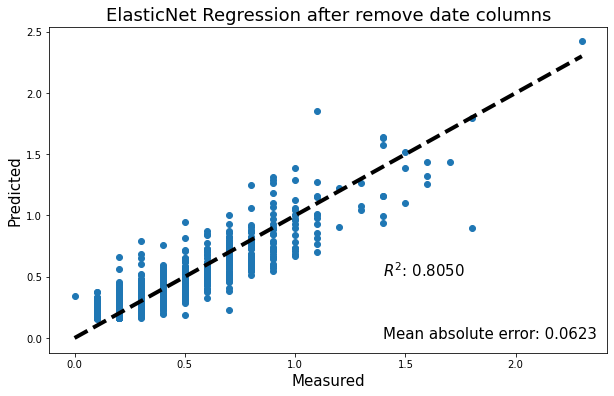

In [ ]:
do_experiment(get_experiment_date_data(), 'ElasticNet Regression after remove date columns', ElasticNet, {'random_state': 0})

2. Repeat the experiment,check the influence of these "weathter columns" in the MAE.

Explained Variance Score:  0.8046482836560608
Mean Absolute Error: 0.06239813056552423
Mean Squared Error: 0.008161746637900412
Root Mean Squared Error: 0.09034238561107634


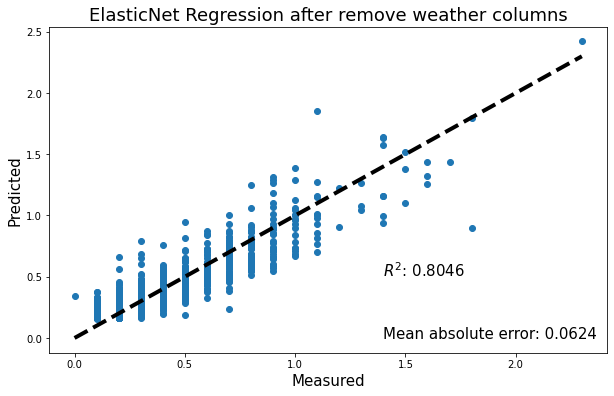

In [ ]:
do_experiment(get_experiment_weather_data(), 'ElasticNet Regression after remove weather columns', ElasticNet, {'random_state': 0})

3. Repeat the experiment,check the influence of these "traffic columns" in the MAE.

Explained Variance Score:  0.8054267638874413
Mean Absolute Error: 0.06264637609916751
Mean Squared Error: 0.00812927157603031
Root Mean Squared Error: 0.09016247321380615


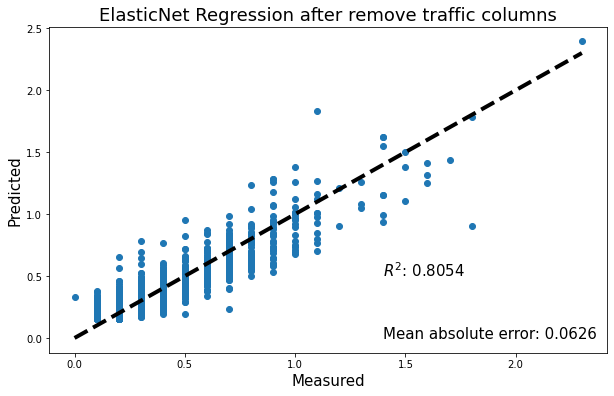

In [ ]:
do_experiment(get_experiment_traffic_data(), 'ElasticNet Regression after remove traffic columns', ElasticNet, {'random_state': 0})

## Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rrr = RandomForestRegressor(random_state=0, n_estimators=1001)

Y_pred = rrr.fit(X_train, Y_train).predict(X_test)

In [ ]:
print_score(Y_test, Y_pred)

Explained Variance Score:  0.9109874469309582
Mean Absolute Error: 0.036934726290658075
Mean Squared Error: 0.003719598337963007
Root Mean Squared Error: 0.06098850988475622


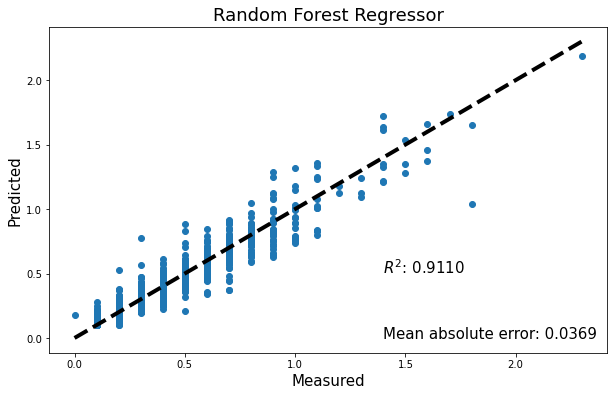

In [ ]:
visual_predict(Y_test, Y_pred, 'Random Forest Regressor')

1. Repeat the experiment,check the influence of these "date columns" in the MAE.

Explained Variance Score:  0.8825931416662356
Mean Absolute Error: 0.04637792715758811
Mean Squared Error: 0.004906056374415123
Root Mean Squared Error: 0.07004324645827835


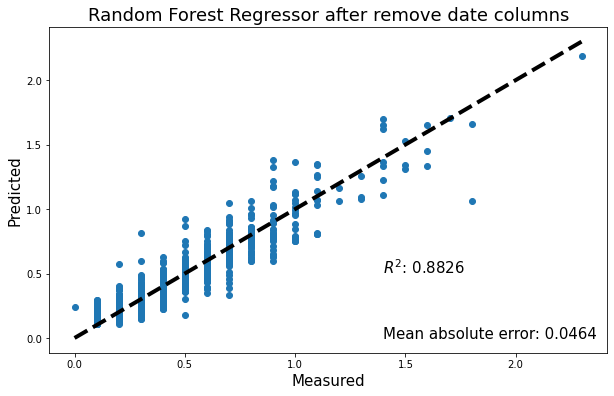

In [ ]:
do_experiment(get_experiment_date_data(), 'Random Forest Regressor after remove date columns', RandomForestRegressor, {'random_state': 0, 'n_estimators': 1001 })

2. Repeat the experiment,check the influence of these "weathter columns" in the MAE.

Explained Variance Score:  0.9064614050827623
Mean Absolute Error: 0.0377510624968248
Mean Squared Error: 0.003908555238594682
Root Mean Squared Error: 0.06251843918872801


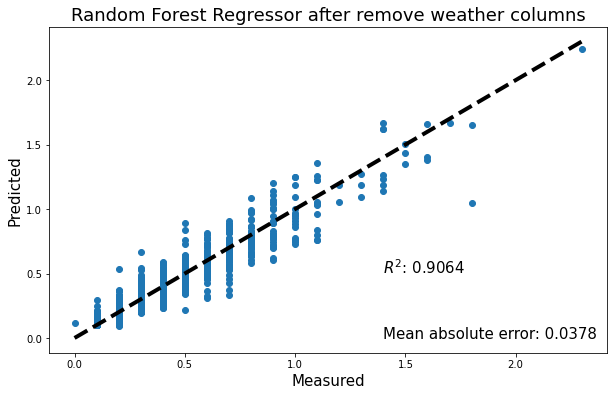

In [ ]:
do_experiment(get_experiment_weather_data(), 'Random Forest Regressor after remove weather columns', RandomForestRegressor, {'random_state': 0, 'n_estimators': 1001})

3. Repeat the experiment,check the influence of these "traffic columns" in the MAE.

Explained Variance Score:  0.9109596789233301
Mean Absolute Error: 0.036883861900810624
Mean Squared Error: 0.0037205812660391804
Root Mean Squared Error: 0.06099656765785416


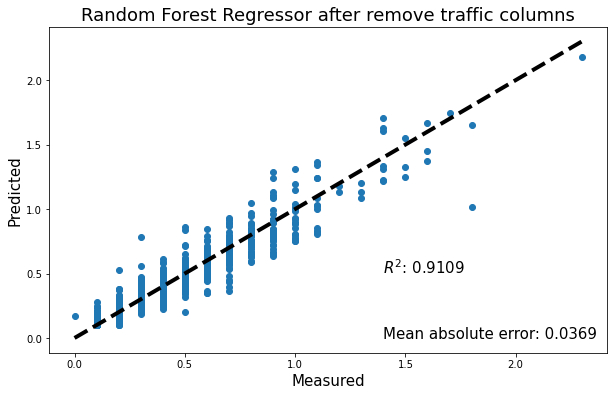

In [ ]:
do_experiment(get_experiment_traffic_data(), 'Random Forest Regressor after remove traffic columns', RandomForestRegressor, {'random_state': 0, 'n_estimators': 1001})

## Step4. Export Model

By comparison, we can find that the random forest regressor model has the best mae score.

In [ ]:
import joblib

name = "model.pkl"

joblib.dump(rrr, name)

['model.pkl']

## Step5. Forecast pollutant  for the next 12 hours

In [ ]:
model = joblib.load(name)

preds = model.predict(X_test)

print("h+12 forecast")
print(preds)

h+12 forecast
[0.100999   0.21078921 0.23116883 ... 0.19150849 0.21688312 0.21628372]


In [ ]:
for i in range(1, 13):
    print(f'h+{i} pollutant value: {preds[i]}')

h+1 pollutant value: 0.210789210789208
h+2 pollutant value: 0.23116883116883025
h+3 pollutant value: 0.23676323676323566
h+4 pollutant value: 0.3351648351648381
h+5 pollutant value: 0.2549450549450554
h+6 pollutant value: 0.3077922077922111
h+7 pollutant value: 0.3020979020979047
h+8 pollutant value: 1.717982017982027
h+9 pollutant value: 0.1575424575424558
h+10 pollutant value: 0.2001998001997974
h+11 pollutant value: 0.23296703296703142
h+12 pollutant value: 0.20269730269729985


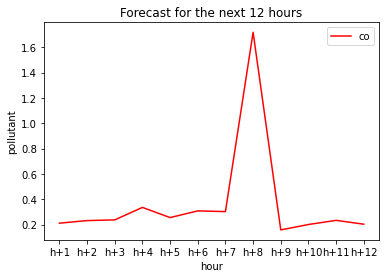

In [ ]:
plt.plot(range(1, 13), preds[1:13], color="red", label="co")
plt.legend()  # 显示图例
plt.ylabel("pollutant")
plt.xlabel("hour")
plt.title("Forecast for the next 12 hours")
plt.xticks(range(1,13),[ f'h+{i}' for i in range(1,13)])
plt.show()